In [1]:
#Download the training dataset

In [2]:
!curl -O https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 11  191M   11 21.2M    0     0  24.8M      0  0:00:07 --:--:--  0:00:07 24.8M
 39  191M   39 75.7M    0     0  40.8M      0  0:00:04  0:00:01  0:00:03 40.8M
 66  191M   66  128M    0     0  44.8M      0  0:00:04  0:00:02  0:00:02 44.9M
 95  191M   95  183M    0     0  47.6M      0  0:00:04  0:00:03  0:00:01 47.6M
100  191M  100  191M    0     0  47.2M      0  0:00:04  0:00:04 --:--:-- 47.3M


In [3]:
import zipfile

# Extract the archive for the training dataset
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()




In [4]:
#Download the validation dataset

!curl -O  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 28.1M  100 28.1M    0     0  41.0M      0 --:--:-- --:--:-- --:--:-- 41.1M


In [5]:
# Extract the archive for the validation dataset
local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()


In [6]:
#This code below extracts the first 10 images and displays the name for us
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])



total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


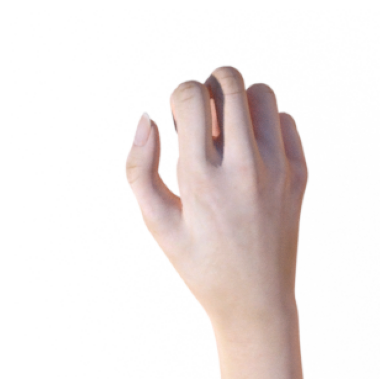

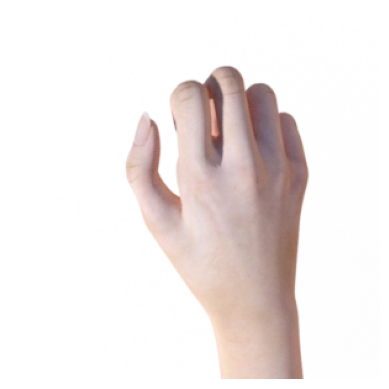

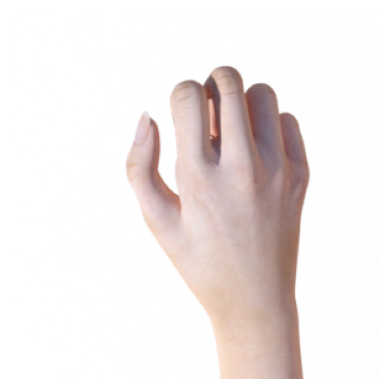

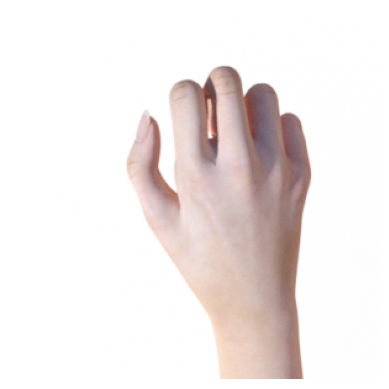

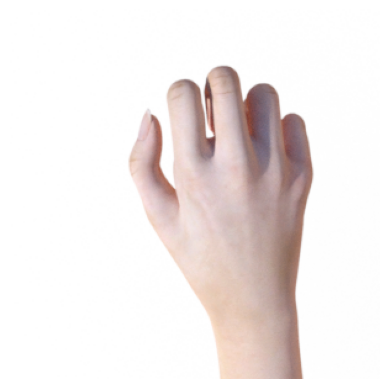

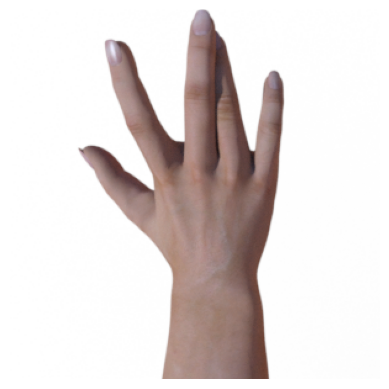

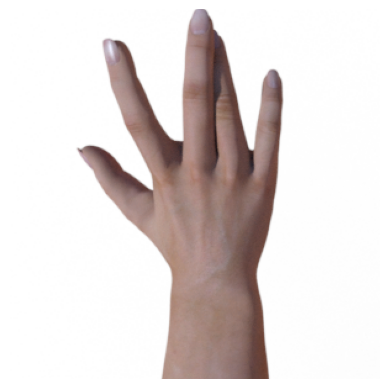

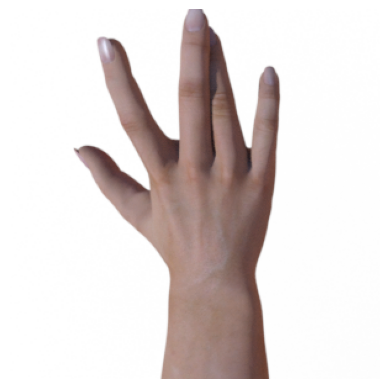

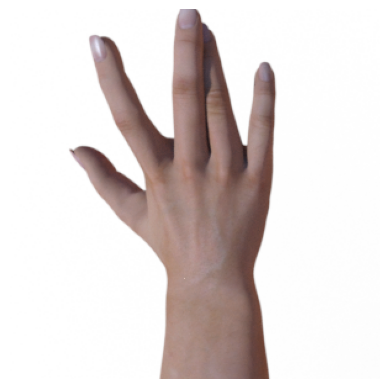

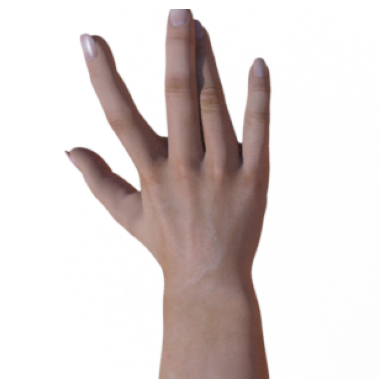

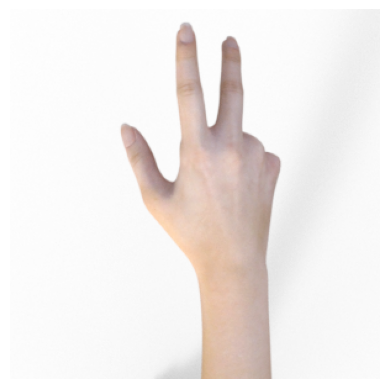

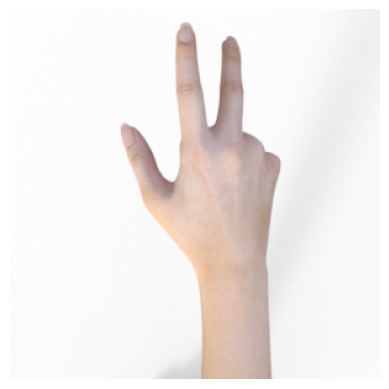

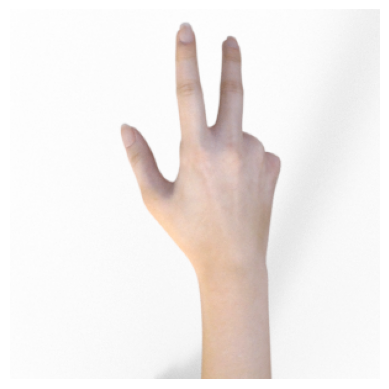

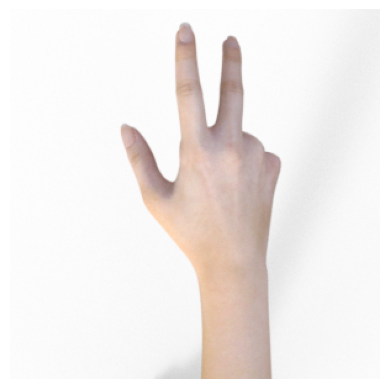

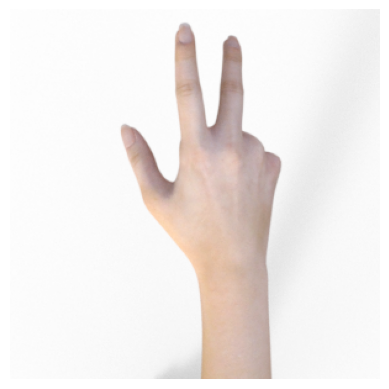

In [7]:
#Now lets visualize some of these images
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 5

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-5:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-5:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-5:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()



In [8]:
#Now let’s build the model
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()





C:\Users\visit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Building the components for backward propagation

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [10]:
#Now we make use of the Image data generator to extract images from the directory and pass it to the model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)



Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [11]:
#Now we train the images
history = model.fit(train_generator, epochs=15,  validation_data = validation_generator, verbose = 1, )

Epoch 1/15


C:\Users\visit\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.3626 - loss: 1.1455 - val_accuracy: 0.4113 - val_loss: 1.0971
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.3586 - loss: 1.0972 - val_accuracy: 0.5538 - val_loss: 1.0824
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.4300 - loss: 1.0702 - val_accuracy: 0.3333 - val_loss: 2.5290
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.5034 - loss: 1.2413 - val_accuracy: 0.8629 - val_loss: 0.5410
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6070 - loss: 0.8558 - val_accuracy: 0.8763 - val_loss: 0.6451
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.6991 - loss: 0.6910 - val_accuracy: 0.9543 - val_loss: 0.5474
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.7456 - loss: 0.6386 - val_accuracy: 0.9785 - val_loss: 0.2310
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.7847 - loss: 0.5863 - val_accuracy: 0.7258 - val_loss: 1.4045
Epo

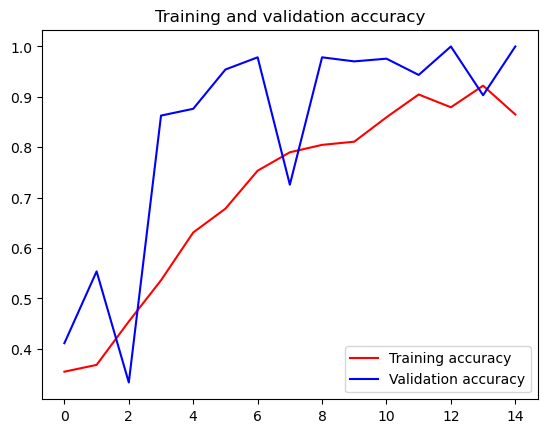

<Figure size 640x480 with 0 Axes>

In [12]:
#We now plot the training and validating accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()



In [14]:
#Testing the model
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from tensorflow.keras.utils import load_img, img_to_array
import io  # Import io module

# Define the class names
class_names = ["paper", "rock", "scissors"]

# Load your trained model here
# model = ... # Ensure this matches your model loading logic

# Create a file upload widget
uploader = widgets.FileUpload(accept='image/*', multiple=True)

def on_upload_change(change):
    print("Uploader value:", uploader.value)  # Diagnostic print
    
    # Check if uploader.value is a tuple and contains dictionaries
    if isinstance(uploader.value, tuple):
        for item in uploader.value:
            if isinstance(item, dict):
                filename = item['name']
                print(filename, 1)
                
                # Convert memoryview to bytes and then to BytesIO stream
                img_stream = io.BytesIO(bytes(item['content']))
                
                # Predicting images
                img = load_img(img_stream, target_size=(150, 150))
                x = img_to_array(img)
                x = np.expand_dims(x, axis=0)

                images = np.vstack([x])
#                 print(images)
                classes = model.predict(images, batch_size=10)
                
                predicted_class_index = np.argmax(classes)
                
                predicted_class_name = class_names[predicted_class_index]
                print(predicted_class_name)
            else:
                print("Warning: uploader.value contains non-dictionary items.")
    elif isinstance(uploader.value, dict):
        for filename, file_info in uploader.value.items():
            print(filename, 2)
            
            # Convert memoryview to bytes and then to BytesIO stream
            img_stream = io.BytesIO(bytes(file_info['content']))
            
            # Predicting images
            img = load_img(img_stream, target_size=(150, 150))
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            images = np.vstack([x])
#             print(images)
            classes = model.predict(images, batch_size=10)
            
            predicted_class_index = np.argmax(classes)
            
            predicted_class_name = class_names[predicted_class_index]
            print(predicted_class_name)
    else:
        print("Warning: uploader.value is neither a dictionary nor a tuple containing dictionaries.")

# Attach the event handler
uploader.observe(on_upload_change, names='value')

# Display the uploader
display(uploader)



FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Uploader value: ({'name': 'testscissors01-00.png', 'type': 'image/png', 'size': 89166, 'content': <memory at 0x000001A4866716C0>, 'last_modified': datetime.datetime(2024, 8, 5, 19, 48, 51, 179000, tzinfo=datetime.timezone.utc)},)
testscissors01-00.png 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
scissors
Uploader value: ({'name': 'testrock01-21.png', 'type': 'image/png', 'size': 83873, 'content': <memory at 0x000001A486673C40>, 'last_modified': datetime.datetime(2024, 8, 5, 19, 48, 50, 375000, tzinfo=datetime.timezone.utc)},)
testrock01-21.png 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
rock
